# Load numpy and all other packages required

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Parameters

In [322]:
NoParticles = 1000;       # Number of particles in the system
xsize = 512;            # Pixel size of the binary image in the x direction, no should be even
ysize = 512;            # Pixel size of the binary image in the y direction, no should be even  
Binaryframewidth = 100;  # Frame around binary image without any cells
dt = 2;                  # Time step of the displacement
Particleradius = 5;      # Radius of the particles in the binary image before Gaussian Blurring and noise addition
Gaussianwidth = 3;       # Standard deviation for Gaussian kernel in px
Noise_std = 70;          # Standard deviation of the noise
width = 100

# Create particles
Here, we generate N particles randomly and homogeneously distributed in the 2d space.

In [323]:
import numpy as np
Particles_Pos = np.random.rand(NoParticles,2)
Particles_Pos[:, 0] = (Particles_Pos[:,0] -0.5) * (xsize - width) 
Particles_Pos[:, 1] = (Particles_Pos[:,1] -0.5) * (ysize - width)

# Generate velocity field
Right now I use a field that attracts the cells to the point (0,0) with the potential V ~ x^2 + y^2. Change vx and vy for other types of displacements, for example rotation around (0,0). 

In [324]:
def velocityx(x, y):
  return -(5 * 2 / xsize) * x; # Alternatively one can use (20 * 2 / xsize) * y
def velocityy(x, y):
  return -(5 * 2 / ysize) * y; # Alternatively one can use -(20 * 2 / ysize) * x

# Displace particles
Here, we displace the cells with the velocity fields vx and vy.

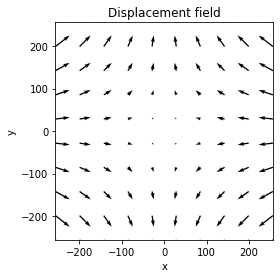

In [325]:
def velocityx(x, y):
  return -(5 * 2 / xsize) * x; # Alternatively one can use (20 * 2 / xsize) * y
def velocityy(x, y):
  return (5 * 2 / ysize) * y; # Alternatively one can use -(20 * 2 / ysize) * x

import numpy as np
import matplotlib.pyplot as plt
# Velocities
vx = velocityx(Particles_Pos[:,0], Particles_Pos[:,1])
vy = velocityy(Particles_Pos[:,0], Particles_Pos[:,1])
# Apply velocity fields to particles
New_Particles_Pos = Particles_Pos * 0;
New_Particles_Pos[:,0] = Particles_Pos[:,0] + vx * dt
New_Particles_Pos[:,1] = Particles_Pos[:,1] + vy * dt


# Create Displacement field image
x,y = np.meshgrid(np.linspace(-xsize/2,xsize/2,10),np.linspace(-ysize/2,ysize/2,10))
vx = dt * velocityx(x,y)
vy = dt * velocityy(x,y)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.quiver(x,y,vx,vy, angles='xy', scale_units='xy')
ax.set_aspect('equal')
plt.xlim([-xsize/2, xsize/2])
plt.ylim([-ysize/2, ysize/2])
plt.title("Displacement field")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('DirectionalField.png', dpi=300)

# Create displacement field figure
Here, I create an image of the displacement field.

In [326]:
# # Create Displacement field image
# x,y = np.meshgrid(np.linspace(-xsize/2,xsize/2,10),np.linspace(-ysize/2,ysize/2,10))
# vx = dt * velocityx(x,y)
# vy = dt * velocityy(x,y)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.quiver(x,y,vx,vy, angles='xy', scale_units='xy')
# ax.set_aspect('equal')
# plt.xlim([-xsize/2, xsize/2])
# plt.ylim([-ysize/2, ysize/2])
# plt.title("Displacement field")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.savefig('DirectionalField.png', dpi=300)

# Figure particles before and after
Here, we create a image of the particles before (red) and after the particles are displaced by the velocity field.

In [327]:
part_pos2 = np.random.rand(NoParticles,2)
part_pos2[:, 0] = (part_pos2[:,0] -0.5) * (xsize) 
part_pos2[:, 1] = (part_pos2[:,1] -0.5) * (ysize)
x = part_pos2
# print(x)
print(x.shape)
x1 = np.take(x, np.where(x<-width*2)[0], axis=0)
x2 = np.take(x, np.where(x>width*2)[0], axis=0)
part_pos2 = np.concatenate([x1,x2])
# part_pos2

(1000, 2)


(-256.0, 256.0)

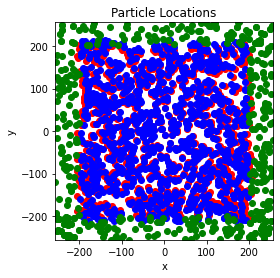

In [328]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(Particles_Pos[:,0], Particles_Pos[:,1], c='r')
plt.scatter(New_Particles_Pos[:,0], New_Particles_Pos[:,1], c='b')
plt.scatter(part_pos2[:,0], part_pos2[:,1], c='green')
plt.title("Particle Locations")
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect('equal')
plt.xlim([-xsize/2, xsize/2])
plt.ylim([-ysize/2, ysize/2])

# Create binary images before and after velocity field applied
Here, we initialize the zero arrays of size (xsize, ysize). Then, we find those pixel that are within a circle of radius "Particleradius", iterate over all particles and add the value 255 into those pixel within the circle.

In [280]:
# Import
import matplotlib.pyplot as plt

# Initialise Arrays
xsizep = xsize+10             # Pixel size of the binary image in the x direction, no should be even
ysizep = ysize+10

Binary      = np.zeros((xsizep,ysizep), dtype=np.int32) 
New_Binary  = np.zeros((xsizep,ysizep), dtype=np.int32) 
# Prepare index array
y, x = np.ogrid[-Particleradius: Particleradius, -Particleradius: Particleradius]
index = x**2 + y**2 <= Particleradius**2
# Add particles to array for the initial binary image

cnts = dict(x=[], y=[])
for j in range(0, NoParticles):
    Centerx = int(Particles_Pos[j,0]+xsizep/2)
    Centery = int(Particles_Pos[j,1]+ysizep/2)
    Binary[Centery-Particleradius:Centery+Particleradius, Centerx-Particleradius:Centerx+Particleradius][index] = 255
    
    cnts['x'].append(Centerx)
    cnts['y'].append(Centery)
    
# Add particles to array for the initial binary image
for j in range(0, NoParticles):
    Centerx = int(New_Particles_Pos[j,0]+xsizep/2)
    Centery = int(New_Particles_Pos[j,1]+ysizep/2)
    New_Binary[Centery-Particleradius:Centery+Particleradius, Centerx-Particleradius:Centerx+Particleradius][index] = 255
    
    
for j in range(len(part_pos2)):
    Centerx = int(part_pos2[j,0]+xsizep/2)
    Centery = int(part_pos2[j,1]+ysizep/2)
    New_Binary[Centery-Particleradius:Centery+Particleradius, Centerx-Particleradius:Centerx+Particleradius][index] = 255
    Binary[Centery-Particleradius:Centery+Particleradius, Centerx-Particleradius:Centerx+Particleradius][index] = 255







# Add a random drift


(512, 512) (512, 512)
(1000, 2)


(28, 2)

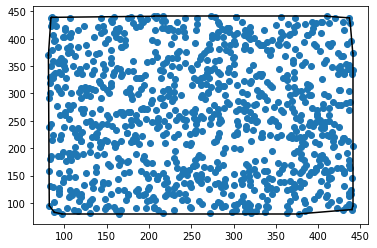

In [281]:
dx = np.random.randint(1,10)
dy = np.random.randint(1,10)

Binary = Binary[dy:ysize+dy, dx:xsize+dx]
New_Binary = New_Binary[dy:ysize+dy, dx:xsize+dx]

print(Binary.shape, New_Binary.shape)

cx,cy = cnts['x'], cnts['y']
arr = np.array([cx,cy]).T

from scipy.spatial import ConvexHull

hull = ConvexHull(arr)
print(arr.shape)
plt.scatter(*arr.T)
roi = dict(x=[], y=[])
for simplex in hull.simplices:
    plt.plot(arr[simplex, 0], arr[simplex, 1], 'k-')
    roi['x'].append(arr[simplex, 0])
    roi['y'].append(arr[simplex, 1])

import math
pp = list(np.array([np.array(roi['x']).flatten(), np.array(roi['y']).flatten()]).T)
cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
roi = np.array(pp)

roi.shape
# plt.plot(roi, c='r')

# Gaussian blur images
Here, we Gaussian Blur the images.

In [282]:
from scipy.ndimage.filters import gaussian_filter
Image_old = gaussian_filter(Binary, sigma=Gaussianwidth)
Image_new = gaussian_filter(New_Binary, sigma=Gaussianwidth)

# Add noise on top of binary images
Here, we add White noise on the data.

In [283]:
import random
for i in range(xsize): 
    for j in range(ysize):
        Noise=random.gauss(0, Noise_std)
        Image_old[i,j] = Image_old[i,j] + Noise
        
# for i in range(xsize): 
#     for j in range(ysize):
        Noise=random.gauss(0, Noise_std)
        Image_new[i,j] = Image_new[i,j] + Noise
        


# Show binary images before and after
Output the images before and after.

[[ 82  82  88  88  97  97 377 377 440 440 441 441 441 441 438 438 437 437
  410 410 206 206  85  85  84  84  81  81]
 [ 95  95  83  83  80  80  80  80  88  88  94  94 374 374 428 428 438 438
  441 441 441 441 439 439 438 438 370 370]]


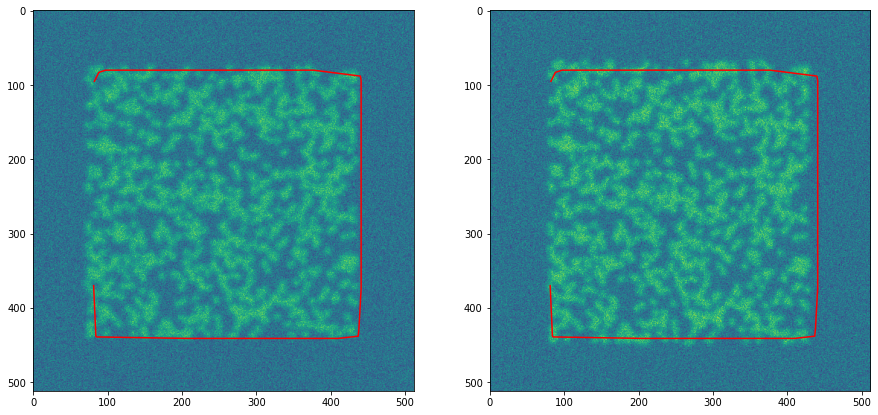

In [284]:
import matplotlib.pyplot as plt
import numpy as np
print(roi.T)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(Image_old)
axarr[1].imshow(Image_new)
axarr[0].plot(*roi.T, c='r')
axarr[1].plot(*roi.T, c='r')

# Save binary images to use them for PIV
Save the images so that they can be used by the TFM pipeline.

In [250]:
bead_ref = Image_old

In [251]:
bead_i = Image_new

In [252]:
img_dummy = np.zeros(bead_ref.shape, dtype=np.int32)

In [253]:
img = np.stack([[bead_i, img_dummy]])
ref = np.stack([bead_ref, img_dummy])

In [254]:
Image_old.shape
Image_new.shape

stack = np.stack([bead_i, bead_ref])



from skimage import io
io.imsave('../data/sim/stack.tif', stack)


# break

<ipython-input-254-95ac84b9ffe8>:9: UserWarning: ../data/sim/stack.tif is a low contrast image
  io.imsave('../data/sim/stack.tif', stack)


In [255]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from pytraction.core import TractionForce
from pytraction.utils import plot

# save images to disk
io.imsave('../data/sim/tfm.tif', img)
io.imsave('../data/sim/tfm-ref.tif', ref)

<ipython-input-255-5e576c8b61f8>:9: UserWarning: ../data/sim/tfm.tif is a low contrast image
  io.imsave('../data/sim/tfm.tif', img)
<ipython-input-255-5e576c8b61f8>:10: UserWarning: ../data/sim/tfm-ref.tif is a low contrast image
  io.imsave('../data/sim/tfm-ref.tif', ref)


In [256]:
pix_per_mu = 1.3 # The number of pixels per micron 
E = 100 # Youngs modulus in Pa

img_path = '../data/sim/tfm.tif'
ref_path = '../data/sim/tfm-ref.tif'

In [257]:


traction_obj = TractionForce(pix_per_mu, E=E) # config TractionForce object
img, ref, _ = traction_obj.load_data(img_path, ref_path) # we can load the dat using the load_data method


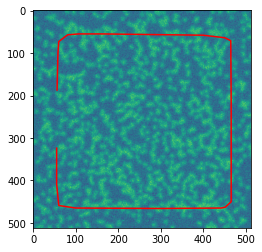

In [258]:
x,y = roi.T
plt.plot(x,y, c='r')
plt.imshow(img[0,0,:,:])

In [259]:
log1 = traction_obj.process_stack(img, ref, verbose=1, roi=(x,y))

Processing stacks


/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/pytraction/utils.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = (x - np.min(x)) / (np.max(x) - np.min(x))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


In [260]:
# log1?

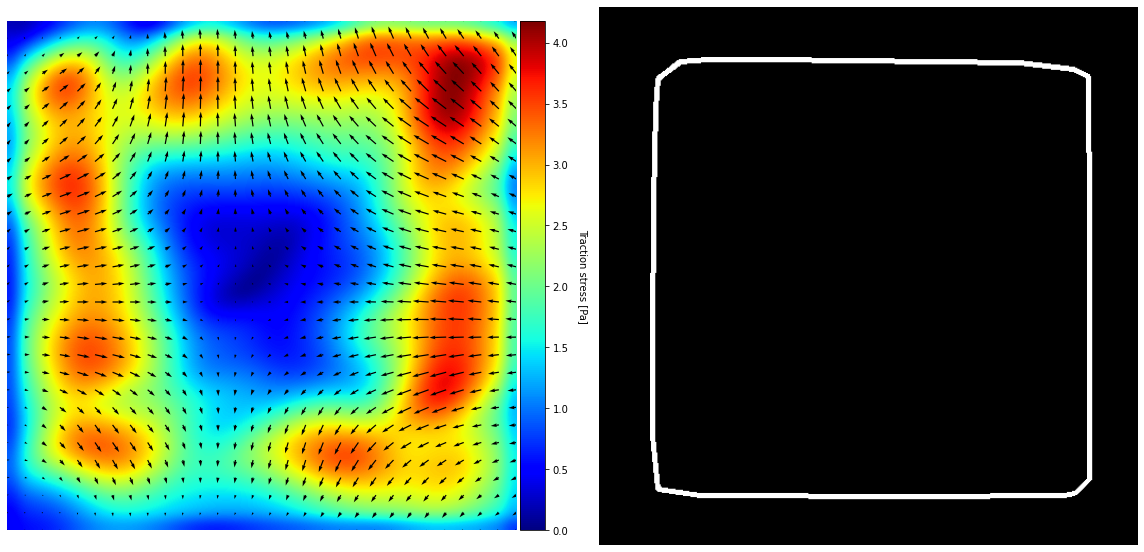

In [264]:
for frame in range(len(log1)):
    plot(log1, frame=frame, mask=False)

In [ ]:
log1['stack_bead_roi'][0]
io.imsave('../data/sim/stack.tif', img)

In [ ]:


plt.scatter(x,y)

In [ ]:
isinstance((x,y), tuple)